In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')

Посмотрим 5 первых и последних строк набора данных

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


Выведем количество строк и столбцов

In [ ]:
print('Dataset has {} number of rows and {} Number of columns'.format ( df.shape[0], df.shape[1]) )

Dataset has 400 number of rows and 26 Number of columns


Выведем информацию о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Выведем характеристики отдельно: типы столбцов

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Описательная статистика

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Количество нулевых значений

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Количество уникальных значений

In [ ]:
df.nunique()

id                400
age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                44
wc                 92
rc                 49
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      3
dtype: int64

Удаляем неинформативные поля

In [ ]:
df.drop(['id'], axis=1, inplace=True)

Слишком много пропущенных значений(от 50)

In [ ]:
df.drop(['rbc'], axis=1, inplace=True)
df.drop(['pc'], axis=1, inplace=True)
df.drop(['sod'], axis=1, inplace=True)
df.drop(['pot'], axis=1, inplace=True)
df.drop(['pcv'], axis=1, inplace=True)
df.drop(['wc'], axis=1, inplace=True)
df.drop(['rc'], axis=1, inplace=True)

В столбцах где пропущенных значений больше 20 но меньше 50 заменим пропуски на самое частотное значение или на среднее

In [ ]:
df['sg'].value_counts().sort_values()

1.005      7
1.015     75
1.025     81
1.010     84
1.020    106
Name: sg, dtype: int64

In [ ]:
df['sg'] = df['sg'].fillna(1.020)
df['sg'].isnull().sum()

0

In [ ]:
df['al'].value_counts().sort_values()

5.0      1
4.0     24
3.0     43
2.0     43
1.0     44
0.0    199
Name: al, dtype: int64

In [ ]:
df['al'] = df['al'].fillna(0.0)
df['al'].isnull().sum()

0

In [ ]:
df['su'].value_counts().sort_values()

5.0      3
1.0     13
4.0     13
3.0     14
2.0     18
0.0    290
Name: su, dtype: int64

In [ ]:
df['su'] = df['su'].fillna(0.0)
df['su'].isnull().sum()

0

In [ ]:
df['bgr'].value_counts().sort_values()

233.0     1
295.0     1
415.0     1
425.0     1
423.0     1
         ..
109.0     6
107.0     8
93.0      9
100.0     9
99.0     10
Name: bgr, Length: 146, dtype: int64

In [ ]:
df['bgr'] = df['bgr'].fillna(df['bgr'].mean())
df['bgr'].isnull().sum()

0

In [ ]:
df['hemo'].value_counts().sort_values()

7.3      1
10.6     1
5.8      1
9.0      1
5.5      1
        ..
11.1     7
13.0     7
13.6     7
10.9     8
15.0    16
Name: hemo, Length: 115, dtype: int64

In [ ]:
df['hemo'] = df['hemo'].fillna(df['hemo'].mean())
df['hemo'].isnull().sum()

0

In [ ]:
df.head()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,notpresent,notpresent,121.000000,36.0,1.2,15.4,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,notpresent,notpresent,148.036517,18.0,0.8,11.3,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,notpresent,notpresent,423.000000,53.0,1.8,9.6,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,present,notpresent,117.000000,56.0,3.8,11.2,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,notpresent,notpresent,106.000000,26.0,1.4,11.6,no,no,no,good,no,no,ckd


In [ ]:
df.isnull().sum()

age                9
bp                12
sg                 0
al                 0
su                 0
pcc                4
ba                 4
bgr                0
bu                19
sc                17
hemo               0
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

Видим что еще остались поля с пропущенными значениями, но так как таких строк немного, удалим их вручную

In [ ]:
df=df.dropna(axis=0)

Построим гистограмму, найдем выбросы (ящиковая диаграмма), удалим аномальные значения, если они имеются, постараемся привести к нормальному распределению столбец bgr и hemo.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


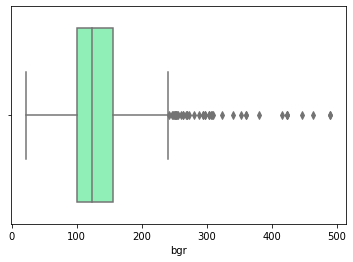

In [ ]:
import seaborn as sns
sns.boxplot(df['bgr'], palette='rainbow')

В столбце bgr аномальных значений в целом не обнаружено

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


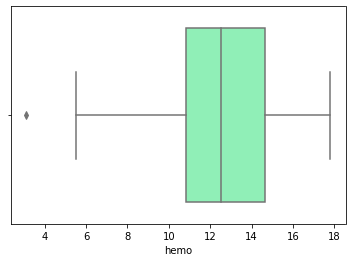

In [ ]:
import seaborn as sns
sns.boxplot(df['hemo'], palette='rainbow')

В столбце hemo также, перейдем сразу к нормализации

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


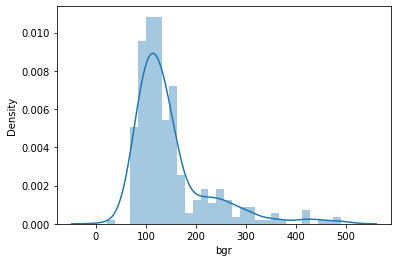

In [ ]:
sns.distplot(df['bgr'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


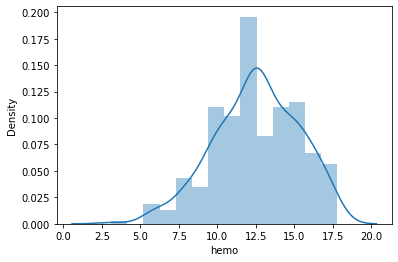

In [ ]:
sns.distplot(df['hemo'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


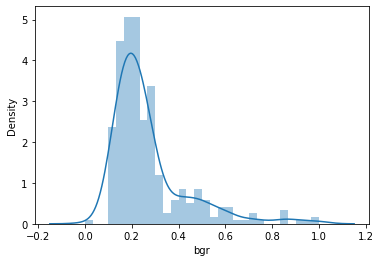

In [ ]:
bgr = df['bgr']
normalized_bgr = (bgr-bgr.min())/(bgr.max()-bgr.min())
df['bgr'] = normalized_bgr
sns.distplot(df['bgr'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


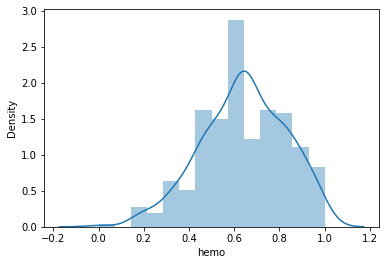

In [ ]:
hemo = df['hemo']
normalized_hemo = (hemo-hemo.min())/(hemo.max()-hemo.min())
df['hemo'] = normalized_hemo
sns.distplot(df['hemo'])

Корреляция между столбцами


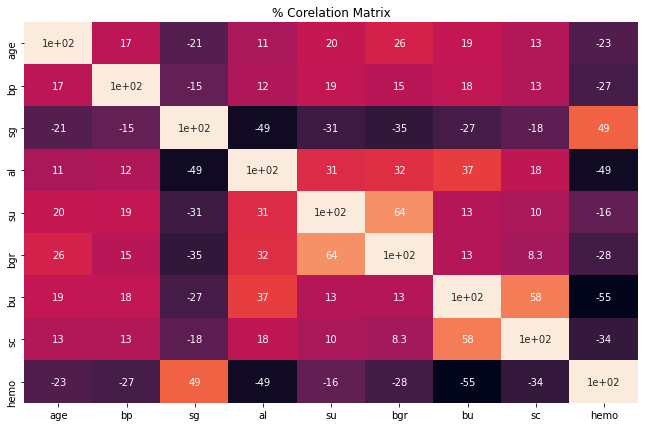

In [ ]:
plt.figure(figsize=(11,7)) 
sns.heatmap(cbar=False, annot=True, data=df.corr()*100) 
plt.title('% Corelation Matrix') 
plt.show()

Построение моделей

Некоторые столбцы являются полностью текстовыми. Как мы знаем, мы не можем использовать текст в данных для обучения модели. Поэтому, прежде чем мы сможем начать процесс, нам нужно эти данные подготовить.


И для преобразования подобных категорий в понятные модели числовые данные мы используем класс LabelEncoder. Таким образом, всё что нам нужно сделать, чтобы получить признак для текстового столбца, это импортировать класс из библиотеки sklearn, обработать колонку функцией fit_transform и заменить существующие текстовые данные новыми закодированными.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.model_selection import cross_validate

In [ ]:
le = LabelEncoder()
df['pcc'] = le.fit_transform(df['pcc'])
df['ba'] = le.fit_transform(df['ba'])
df['htn'] = le.fit_transform(df['htn'])
df['dm'] = le.fit_transform(df['dm'])
df['cad'] = le.fit_transform(df['cad'])
df['appet'] = le.fit_transform(df['appet'])
df['pe'] = le.fit_transform(df['pe'])
df['ane'] = le.fit_transform(df['ane'])


Выделяем целевую переменную и факторные переменные и делим выборку на тестовую и тренировочную

In [ ]:
y = df['classification']
X = df[['age',	'bp',	'sg',	'al',	'su',	'pcc',	'ba',	'bgr',	'bu',	'sc',	'hemo',	'htn',	'dm',	'cad',	'appet',	'pe',	'ane']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=54)

In [ ]:
lr = LogisticRegression()
lr.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(test_X, test_y)

0.9295774647887324

In [ ]:
print(metrics.classification_report(test_y, lr.predict(test_X)))

              precision    recall  f1-score   support

         ckd       1.00      0.87      0.93        38
      notckd       0.87      1.00      0.93        33

    accuracy                           0.93        71
   macro avg       0.93      0.93      0.93        71
weighted avg       0.94      0.93      0.93        71



С помощью логистической регрессии мы получаем хорошую модель с довольно высокой точностью. Однако стоит учитывать, что наша выборка была слишком мала, чтобы мы могли использовать такую модель в реальной жизни

In [ ]:
# Метод опорных векторов с линейным ядром
m2 = SVC(kernel = 'linear', class_weight='balanced')
m2.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
m2.score(test_X, test_y)

0.8873239436619719

In [ ]:
print(metrics.classification_report(test_y, m2.predict(test_X)))

              precision    recall  f1-score   support

         ckd       1.00      0.79      0.88        38
        ckd	       0.00      0.00      0.00         0
      notckd       0.87      1.00      0.93        33

    accuracy                           0.89        71
   macro avg       0.62      0.60      0.60        71
weighted avg       0.94      0.89      0.90        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


В целом, мы видим, что модель значима и она имеет хорошую точность как при логистической регрессии, так и при методе опорных векторов. Точность получилась выше в первом случае, но в случае с SVM  точность 0,89 - это также довольно хороший результат

Попробуем 3 модель - random forest, затем посмотрим полученные метрики и сравним с предыдущими моделями

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m3 = RandomForestClassifier()
m3.fit(train_X, train_y)
m3.score(test_X, test_y)
print(metrics.classification_report(test_y, m3.predict(test_X)))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        38
      notckd       1.00      1.00      1.00        33

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



Получается 100-процентная точность, что вызывает некоторые сомнения, однако это отличный результат в рамках данной работы

Рассмотрим 4 метод: метод k-ближайших соседей

In [ ]:
import sklearn.neighbors as neigh
m4 = neigh.KNeighborsClassifier(n_neighbors=5)
m4.fit(train_X, train_y)
m4.score(test_X, test_y)
print(metrics.classification_report(test_y, m4.predict(test_X)))

              precision    recall  f1-score   support

         ckd       0.88      0.79      0.83        38
      notckd       0.78      0.88      0.83        33

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.84      0.83      0.83        71



Из 4 рассмотренных моделей, мы получаем самый неточный результат, однако accuracy = 0,83 все равно довольно высока

Рассмотрим последний, 5 метод, svc с полиномиальным ядром

In [ ]:
m5 = SVC(kernel = 'poly')
m5.fit(train_X, train_y)
m5.score(test_X, test_y)
print(metrics.classification_report(test_y, m5.predict(test_X)))

              precision    recall  f1-score   support

         ckd       0.86      0.66      0.75        38
      notckd       0.69      0.88      0.77        33

    accuracy                           0.76        71
   macro avg       0.78      0.77      0.76        71
weighted avg       0.78      0.76      0.76        71



Из всех рассмотренных методов это самый слабый результат. Таким образом, мы получили наилучшую точность, используя random forest, далее с результатом 0,93 логистическая регрессия, метод опорных векторов оказался не таким точным с данной задаче, как и метод k-ближайших соседей